In [1]:
import numpy as np
import matplotlib.pyplot as plt
import connection_length as cnc
from importlib import reload
import matplotlib.image as mpimg

In [2]:
reload(cnc)

<module 'connection_length' from '/turquoise/users/giannis_kx/python_pixie/connection_length.py'>

In [3]:
plt.style.use('ggplot')
plt.rcParams['font.size'] = 20
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['axes.labelweight'] = 'heavy'
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['figure.titlesize'] = 12
plt.rcParams['text.usetex']=True

In [5]:
cnc.store_coordinate_arrays("/lustre/scratch4/turquoise/giannis_kx/pixie3d/iter/db_tear/dt2.scratch./")

In [6]:
cnc_filepath = "/lustre/scratch4/turquoise/giannis_kx/FTLE/dt_new_t2000/"

In [7]:
cnc_ts = "2000.000"
filenum = 32

In [8]:
norm = 2.18

In [9]:
xs,zs,conn = cnc.read_connection_lengths(cnc_filepath,cnc_ts,filenum)

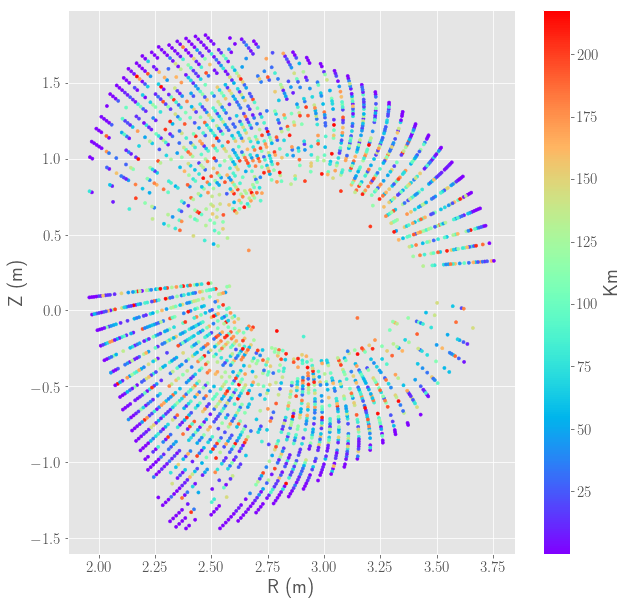

In [10]:
plt.figure(figsize=(10,10))
c=[(c*norm/1000) for c in conn]
plt.scatter(xs,zs,c=c,s=10,cmap="rainbow")
#cs.cmap.set_over('k')
#cs.cmap.set_under('y')
plt.xlabel('R (m)')
plt.ylabel('Z (m)')
cbar = plt.colorbar()
cbar.ax.set_ylabel("Km")
plt.show()

In [11]:
import pixie_read_st as pxr

In [12]:
filepath = "/lustre/scratch4/turquoise/giannis_kx/pixie3d/iter/db_tear/dt2.scratch./pixie3d.h5"

In [13]:
pxr.pixieload(filepath)

timesteps= 205
Dictionary of terms:
Variables: ['Car_variables', 'Cnv_variables', 'Cov_variables', 'Diagnostics', 'Perturbations', 'cells', 'nodes']
Cartesian: ['Bx', 'By', 'Bz', 'Jx', 'Jy', 'Jz', 'Prs', 'Ve_1', 'Ve_2', 'Ve_3', 'Vx', 'Vy', 'Vz', 'rho']
Contravariant: ['B^1', 'B^2', 'B^3', 'J*P^2', 'J.(pi+pe)', 'J.Rho', 'J^1', 'J^2', 'J^3', 'P^1', 'P^3']
Covariant: ['B_1', 'B_2', 'B_3', 'J_1', 'J_2', 'J_3', 'T=Te+Ti', 'V_1', 'V_2', 'V_3', 'rho']
Diagnostic: ['E_1', 'E_2', 'E_3', 'Int. heat src', 'Poloidal flux', 'Ti+Te', 'chi par', 'chi perp', 'diff', 'eta', 'lambda', 'local div(B)', 'local div(J)', 'local div(V)', 'nu', 'q factor']
Perturbations: ['B^1_pert', 'B^2_pert', 'B^3_pert', 'P^1_pert', 'P^2_pert', 'P^3_pert', 'Prs_pert', 'Rho_pert']
Cell: ['X', 'Y', 'Z']
Node: ['X', 'Y', 'Z']


In [14]:
pxr.Coordinate_Maps_Interpolations()

In [15]:
# Initial condition grid
Nr = 100
Nu = 100
r_ic = np.linspace(0,1,Nr)
u_ic = np.linspace(0.0,2*np.pi,Nu)
R_grid, U_grid = np.meshgrid(r_ic,u_ic)

In [20]:
#filepath_cnc = "/net/scratch3/giannis_kx/FTLE/dt_new/"
filepath_cnc = "/lustre/scratch4/turquoise/giannis_kx/FTLE/dt_new/"

t=1200

In [21]:
rs1,us1,conn1 = cnc.read_connection_lengths_logical(filepath_cnc+"t1200/","1200.932",32)

In [22]:
CNL1, Ctuples1 = cnc.cnc_coord_tuples(rs1,us1,conn1)

In [23]:
conn_array1 = cnc.conn_array(CNL1,Ctuples1,R_grid,U_grid,100,100)

/usr/projects/hpcsoft/toss3/common/anaconda/5.0.1-python-3.6/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


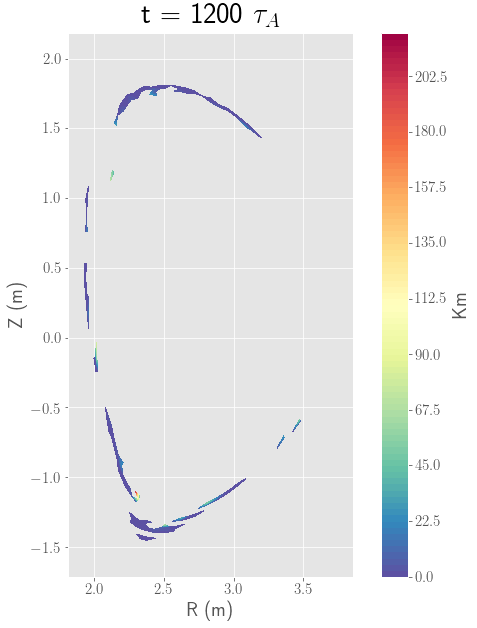

In [24]:
plt.figure(figsize=(10,10))
plt.contourf(pxr.X_int((R_grid,U_grid,0)),pxr.Z_int((R_grid,U_grid,0)),(conn_array1*2.18)/1000,100,cmap='Spectral_r')
plt.xlabel('R (m)')
plt.ylabel('Z (m)')
plt.axes().set_aspect("equal")
cbar = plt.colorbar()
cbar.ax.set_ylabel("Km")
plt.title(r"t = 1200 $\tau_A$")
plt.show()

t=1452

In [25]:
rs2,us2,conn2 = cnc.read_connection_lengths_logical(filepath_cnc+"t1400/","1452.170",32)
CNL2, Ctuples2 = cnc.cnc_coord_tuples(rs2,us2,conn2)
conn_array2 = cnc.conn_array(CNL2,Ctuples2,R_grid,U_grid,100,100)

/usr/projects/hpcsoft/toss3/common/anaconda/5.0.1-python-3.6/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


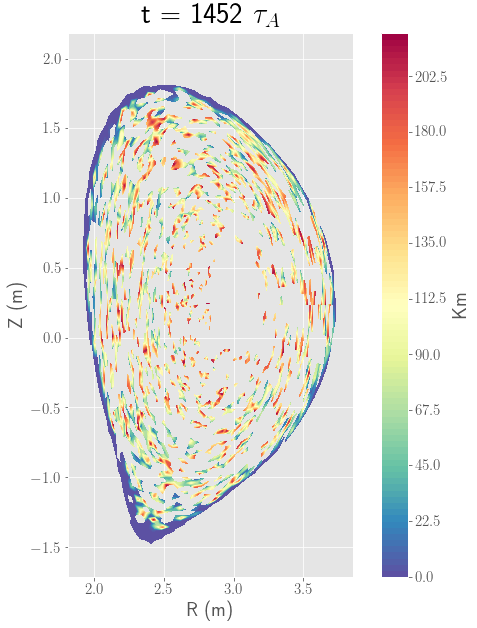

In [26]:
plt.figure(figsize=(10,10))
plt.contourf(pxr.X_int((R_grid,U_grid,0)),pxr.Z_int((R_grid,U_grid,0)),(conn_array2*2.18)/1000,100,cmap='Spectral_r')
plt.xlabel('R (m)')
plt.ylabel('Z (m)')
plt.axes().set_aspect("equal")
cbar = plt.colorbar()
cbar.ax.set_ylabel("Km")
plt.title(r"t = 1452 $\tau_A$")
plt.show()

In [49]:
R_bins = list(set(rs2))

In [53]:
R_bins.sort()

In [70]:
bin1 = 0
bin2 = 0
bin3 = 0 
bin4 = 0
bin5 = 0
bin6 = 0
bin7 = 0 
bin8 = 0
bin9 = 0
num1 = 0
num2 = 0
num3 = 0 
num4 = 0
num5 = 0
num6 = 0
num7 = 0 
num8 = 0
num9 = 0

bin_val1 = []
bin_val2 = []
bin_val3 = []
bin_val4 = []
bin_val5 = []
bin_val6 = []
bin_val7 = []
bin_val8 = []
bin_val9 = []

for i in range(len(rs2)):
    if rs2[i]>R_bins[0] and rs2[i]<R_bins[10]:
        bin1 += conn2[i]
        num1 += 1
        bin_val1.append(conn2[i])
    if rs2[i]>R_bins[11] and rs2[i]<R_bins[20]:
        bin2 += conn2[i]
        num2 += 1
        bin_val2.append(conn2[i])
    if rs2[i]>R_bins[21] and rs2[i]<R_bins[30]:
        bin3 += conn2[i]
        num3 += 1
        bin_val3.append(conn2[i])
    if rs2[i]>R_bins[31] and rs2[i]<R_bins[40]:
        bin4 += conn2[i] 
        num4 += 1
        bin_val4.append(conn2[i])
    if rs2[i]>R_bins[41] and rs2[i]<R_bins[50]:
        bin5 += conn2[i]
        num5 += 1
        bin_val5.append(conn2[i])
    if rs2[i]>R_bins[51] and rs2[i]<R_bins[60]:
        bin6 += conn2[i]
        num6 += 1
        bin_val6.append(conn2[i])
    if rs2[i]>R_bins[61] and rs2[i]<R_bins[70]:
        bin7 += conn2[i]
        num7 += 1
        bin_val7.append(conn2[i])
    if rs2[i]>R_bins[71] and rs2[i]<R_bins[80]:
        bin8 += conn2[i] 
        num8 += 1
        bin_val8.append(conn2[i])
    if rs2[i]>R_bins[81] and rs2[i]<R_bins[-1]:
        bin9 += conn2[i] 
        num9 += 1
        bin_val9.append(conn2[i])

In [71]:
avg1 = bin1/num1
avg2 = bin2/num2
avg3 = bin3/num3
avg4 = bin4/num4
avg5 = bin5/num5
avg6 = bin6/num6
avg7 = bin7/num7
avg8 = bin8/num8
avg9 = bin9/num9
max1 = max(bin_val1)
max2 = max(bin_val2)
max3 = max(bin_val3)
max4 = max(bin_val4)
max5 = max(bin_val5)
max6 = max(bin_val6)
max7 = max(bin_val7)
max8 = max(bin_val8)
max9 = max(bin_val9)

min1 = min(bin_val1)
min2 = min(bin_val2)
min3 = min(bin_val3)
min4 = min(bin_val4)
min5 = min(bin_val5)
min6 = min(bin_val6)
min7 = min(bin_val7)
min8 = min(bin_val8)
min9 = min(bin_val9)

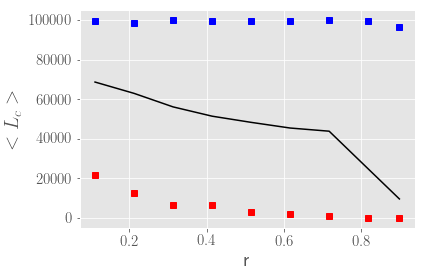

In [72]:
plt.plot((R_bins[10],R_bins[20],R_bins[30],R_bins[40],R_bins[50],R_bins[60],R_bins[70],R_bins[80],R_bins[-1]),(avg1,avg2,avg3,avg4,avg5,avg6,avg7,avg8,avg9),"k")
plt.plot((R_bins[10],R_bins[20],R_bins[30],R_bins[40],R_bins[50],R_bins[60],R_bins[70],R_bins[80],R_bins[-1]),(min1,min2,min3,min4,min5,min6,min7,min8,min9),"rs")
plt.plot((R_bins[10],R_bins[20],R_bins[30],R_bins[40],R_bins[50],R_bins[60],R_bins[70],R_bins[80],R_bins[-1]),(max1,max2,max3,max4,max5,max6,max7,max8,max9),"bs")
plt.xlabel("r")
plt.ylabel(r"$<L_c>$")
plt.show()

t=2000

In [73]:
rs3,us3,conn3 = cnc.read_connection_lengths_logical(filepath_cnc+"t2000/","2000.000",32)
CNL3, Ctuples3 = cnc.cnc_coord_tuples(rs3,us3,conn3)
conn_array3 = cnc.conn_array(CNL3,Ctuples3,R_grid,U_grid,100,100)

/usr/projects/hpcsoft/toss3/common/anaconda/5.0.1-python-3.6/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


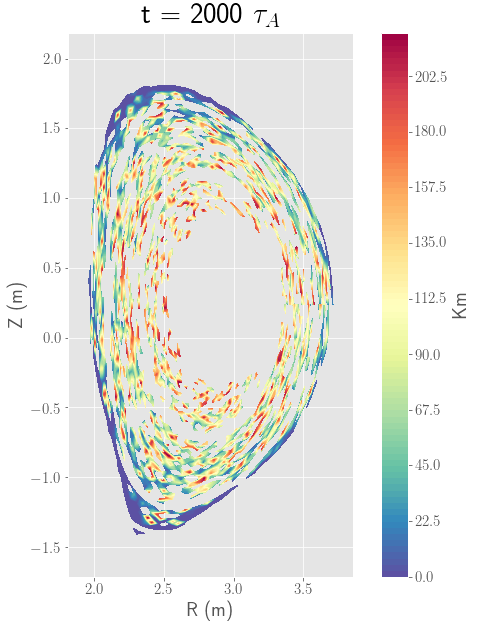

In [74]:
plt.figure(figsize=(10,10))
plt.contourf(pxr.X_int((R_grid,U_grid,0)),pxr.Z_int((R_grid,U_grid,0)),(conn_array3*2.18)/1000,100,cmap='Spectral_r')
plt.xlabel('R (m)')
plt.ylabel('Z (m)')
plt.axes().set_aspect("equal")
cbar = plt.colorbar()
cbar.ax.set_ylabel("Km")
plt.title(r"t = 2000 $\tau_A$")
plt.show()

In [83]:
reload(cnc)

<module 'connection_length' from '/turquoise/users/giannis_kx/python_pixie/connection_length.py'>

In [76]:
 R_bins2 = list(set(rs3))

In [87]:
R_bins2.sort()

In [77]:
len(R_bins2)

60

In [84]:
avg12,avg22,avg32,avg42,avg52,avg62,min12,min22,min32,min42,min52,min62,max12,max22,max32,max42,max52,max62 = cnc.R_Bins(rs3,conn3)

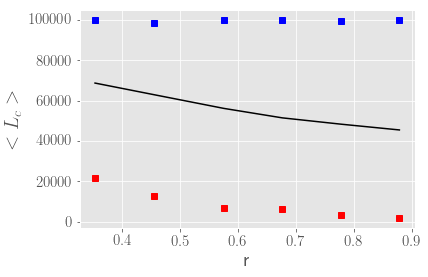

In [88]:
plt.plot((R_bins2[10],R_bins2[20],R_bins2[30],R_bins2[40],R_bins2[50],R_bins2[-1]),(avg1,avg2,avg3,avg4,avg5,avg6),"k")
plt.plot((R_bins2[10],R_bins2[20],R_bins2[30],R_bins2[40],R_bins2[50],R_bins2[-1]),(min1,min2,min3,min4,min5,min6),"rs")
plt.plot((R_bins2[10],R_bins2[20],R_bins2[30],R_bins2[40],R_bins2[50],R_bins2[-1]),(max1,max2,max3,max4,max5,max6),"bs")
plt.xlabel("r")
plt.ylabel(r"$<L_c>$")
plt.show()

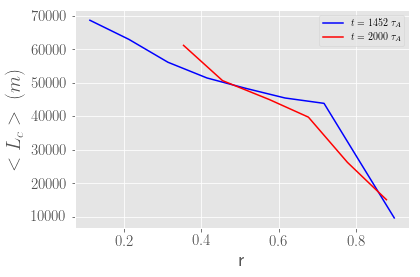

In [123]:
plt.plot((R_bins[10],R_bins[20],R_bins[30],R_bins[40],R_bins[50],R_bins[60],R_bins[70],R_bins[80],R_bins[-1]),(avg1,avg2,avg3,avg4,avg5,avg6,avg7,avg8,avg9),"b",label=r"$t=1452\; \tau_A$")
plt.plot((R_bins2[10],R_bins2[20],R_bins2[30],R_bins2[40],R_bins2[50],R_bins2[-1]),(avg12,avg22,avg32,avg42,avg52,avg62),"r",label=r"$t=2000 \; \tau_A$")
plt.xlabel("r")
plt.ylabel(r"$<L_c> \;(m)$")
plt.legend()
plt.show()

In [127]:
reload(cnc)

<module 'connection_length' from '/turquoise/users/giannis_kx/python_pixie/connection_length.py'>

In [128]:
avg_list1, r_list1 = cnc.R_Bins2(rs1,conn1,2.18,100000,6)
avg_list3, r_list3 = cnc.R_Bins2(rs3,conn3,2.18,100000,6)
avg_list2, r_list2 = cnc.R_Bins2(rs2,conn2,2.18,100000,6)

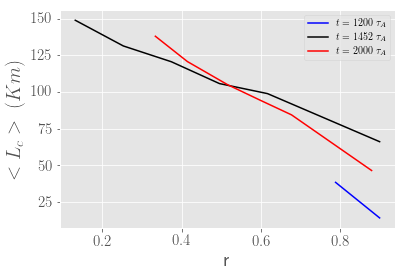

In [131]:
plt.plot(r_list1[4:],avg_list1[4:],"b",label = r"$t = 1200 \; \tau_A$")
plt.plot(r_list2,avg_list2,"k",label = r"$t = 1452 \; \tau_A$")
plt.plot(r_list3,avg_list3,"r",label = r"$t = 2000 \; \tau_A$")
plt.legend()
plt.xlabel("r")
plt.ylabel(r"$<L_c>\; (Km)$")
plt.show()